In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve

from heuristic_funcs import *

In [31]:
def auc_plot(y_test_arr, y_pred_arr):
    fpr, tpr, thresholds = roc_curve(y_test_arr, y_pred_arr)
    plt.plot(fpr,tpr)
    plt.show()

In [25]:
data_path = "../data/dedup-data-6187_37728.csv"

df = pd.read_csv(data_path, usecols=['w1', 'w2', 'isDuplicate']).sample(frac=1).reset_index(drop=True)

df_train=df[:int(0.7*len(df))]
df_test =df[int(0.7*len(df)):]

In [26]:
df_train['isDuplicate'].value_counts()

0.0    26403
1.0     4337
Name: isDuplicate, dtype: int64

In [27]:
for th in [1,2,3,4,5]:
    df_train['predictedDuplicated_{}'.format(th)] = df_train.apply(lambda x: isDuplicateHeuristic(x['w1'], x['w2'], threshold=th), axis=1)

C:\Users\soham\AppData\Local\Temp/ipykernel_9252/1737909908.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['predictedDuplicated_{}'.format(th)] = df_train.apply(lambda x: isDuplicateHeuristic(x['w1'], x['w2'], threshold=th), axis=1)


              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     26403
         1.0       1.00      0.47      0.64      4337

    accuracy                           0.92     30740
   macro avg       0.96      0.73      0.80     30740
weighted avg       0.93      0.92      0.91     30740



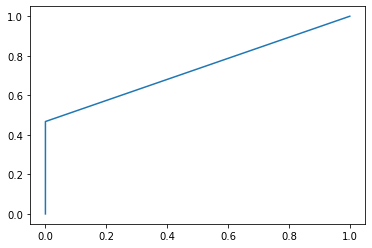



              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96     26403
         1.0       0.93      0.53      0.68      4337

    accuracy                           0.93     30740
   macro avg       0.93      0.76      0.82     30740
weighted avg       0.93      0.93      0.92     30740



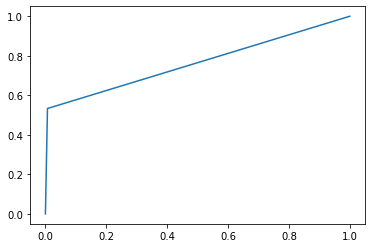



              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96     26403
         1.0       0.96      0.54      0.69      4337

    accuracy                           0.93     30740
   macro avg       0.94      0.77      0.83     30740
weighted avg       0.93      0.93      0.92     30740



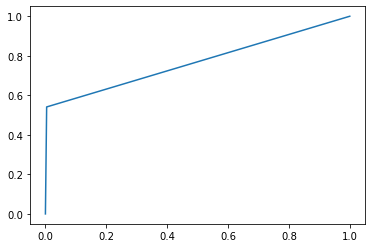



              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96     26403
         1.0       0.94      0.53      0.68      4337

    accuracy                           0.93     30740
   macro avg       0.93      0.76      0.82     30740
weighted avg       0.93      0.93      0.92     30740



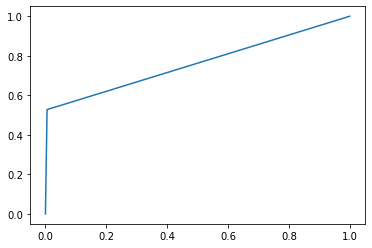

In [32]:
for th in [1,2,3,4]:
    print(classification_report(df_train['isDuplicate'], df_train['predictedDuplicated_{}'.format(th)], target_names=["0.0","1.0"]))
    auc_plot(df_train['isDuplicate'], df_train['predictedDuplicated_{}'.format(th)])
    print('\n')

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     26447
         1.0       1.00      0.46      0.63      4293

    accuracy                           0.92     30740
   macro avg       0.96      0.73      0.79     30740
weighted avg       0.93      0.92      0.91     30740



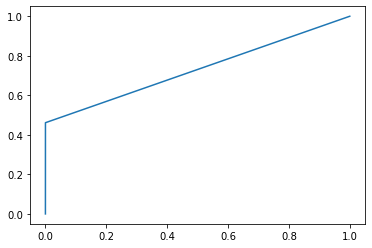



              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96     26447
         1.0       0.93      0.52      0.67      4293

    accuracy                           0.93     30740
   macro avg       0.93      0.76      0.81     30740
weighted avg       0.93      0.93      0.92     30740



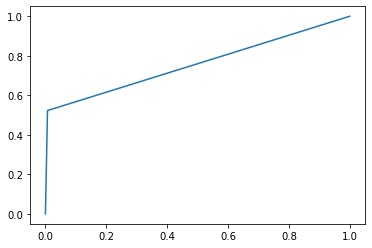



              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96     26447
         1.0       0.95      0.53      0.68      4293

    accuracy                           0.93     30740
   macro avg       0.94      0.76      0.82     30740
weighted avg       0.93      0.93      0.92     30740



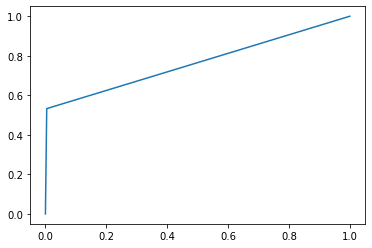



              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96     26447
         1.0       0.94      0.52      0.67      4293

    accuracy                           0.93     30740
   macro avg       0.93      0.76      0.81     30740
weighted avg       0.93      0.93      0.92     30740



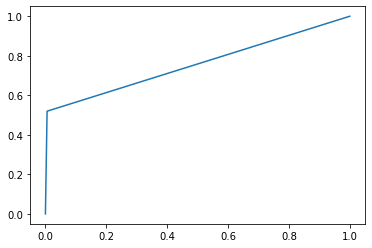

In [22]:
for th in [1,2,3,4]:
    print(classification_report(df_train['isDuplicate'], df_train['predictedDuplicated_{}'.format(th)], target_names=["0.0","1.0"]))
    auc_plot(df_train['isDuplicate'], df_train['predictedDuplicated_{}'.format(th)])
    print('\n')